# Set up

In [1]:
import gym_super_mario_bros # Importing the Super Mario Bros environment
from nes_py.wrappers import JoypadSpace # Importing joypad wrapper
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT # Importing simplified controls
import os
from PIL import Image


In [2]:
curr = os.getcwd()
os.chdir('/teamspace/studios/this_studio/RL-Mario')
from save_frame import save_images, save_video

In [3]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [4]:
"""
    1. Creating the environment
    2. Ensuring that the environment is compatible with the OpenAI Gym API
    3. Setting the rendering mode to numpy array form
"""
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode='rgb_array') 
env.action_space.n # Checking the number of actions

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


256

In [5]:
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Applying the wrapper
env.action_space.n # Simplified action space

7

In [6]:
env.observation_space.shape # Checking the shape of the observation space (height, width, channels)

(240, 256, 3)

In [7]:
env.action_space.sample() # Random action

0

In [8]:
env.reset()
env.step(env.action_space.sample()) # Taking a random action

# Ouput format : (observation, reward, done, info, extra_info)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [9]:
# done = True # Checking if the game is done
# for step in range(10000): # Running through the frames
#     if done:
#         env.reset() # Resetting the environment
#     state, reward, done, info, _ = env.step(env.action_space.sample())  # Taking a random action
#     frame = env.render() # Rendering the environment
#     save_images(frame, step) # Saving the images
    
# env.close() # Closing the environment

In [10]:
# save_video('videos', 'random_action.mp4') # Creating the video

In [11]:
state = env.reset()[0] # Resetting the environment
state.shape # Checking the shape of

(240, 256, 3)

In [12]:
len(env.step(1)) # observation, reward, done, info , extra_info

5

# Pre-processing

In [13]:
"""
    GrayScaleObservation : Converting the frames to grayscale for faster processing
    VecFrameStack : Stacking the frames for multiple environments
    DummyVecEnv : Creating a dummy vectorized environment
    plt : Matplotlib for plotting the impact of frame stacking
"""
from gym.wrappers import GrayScaleObservation 
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [14]:
# Creating a base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode='rgb_array')
# Simplifying the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale
env = GrayScaleObservation(env, keep_dim=True) # Keep the dimension : True (height, width, 1) False (height, width)
# Wrap inside DummyVecEnv
env = DummyVecEnv([lambda: env]) # Adds 1 dimension to the observation space for the batch size
# # Stack 4 frames
env = VecFrameStack(env, n_stack=4, channels_order='last') 
# before (batch, height, width, channels) -> after (batch, height, width, channels * n_stack)
env.observation_space.shape # Checking the shape of the observation space

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


(240, 256, 4)

In [15]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs) # JoyPadSpace reset function 

state = env.reset()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


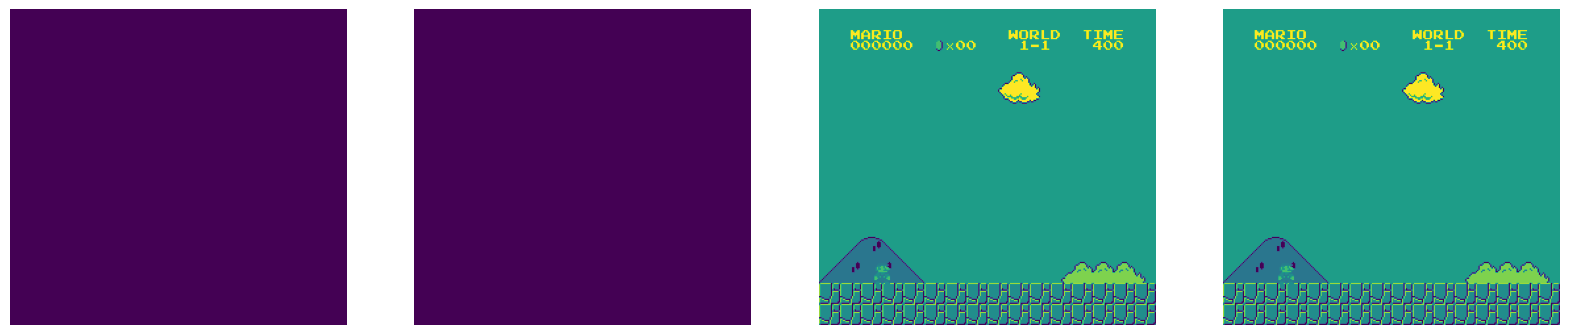

In [16]:
state, reward, done, info = env.step([env.action_space.sample()])  # Taking a random action

plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(state[0][:, :, idx])
    plt.axis('off')

# Train

In [17]:
import os 
from stable_baselines3 import PPO # algo
from stable_baselines3.common.callbacks import BaseCallback # saving the model

In [18]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1): # verbose : 1 (basic info)
        super().__init__()
        self.check_freq = check_freq # Setting the check frequency for saving the model
        self.save_path = save_path 

    def _init_callback(self):
        """ Create the folder for saving the model """
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)


    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            # Saving the model every 1000 steps
            model_path = os.path.join(self.save_path, f'best_model_{self.n_calls}')
            self.model.save(model_path)
        return True

In [19]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [20]:
callback = TrainAndLoggingCallback(check_freq=1000000, save_path=CHECKPOINT_DIR)

In [21]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=1e-6,
            n_steps=2048, batch_size=2048 ) #n_steps -> update frequency per frame n_steps * n_envs

Using cuda device
Wrapping the env in a VecTransposeImage.


In [22]:
model.learn(total_timesteps=10000000, callback=callback)

Logging to ./logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 204  |
|    iterations      | 1    |
|    time_elapsed    | 9    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 164          |
|    iterations           | 2            |
|    time_elapsed         | 24           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 4.331232e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.00179      |
|    learning_rate        | 1e-06        |
|    loss                 | 89.7         |
|    n_updates            | 10           |
|    policy_gradient_loss | -1.6e-05     |
|    value_loss           | 183          |
-----------------------------------

# Test

In [ ]:
model = PPO.load('RL-Mario/train/best_model_9000000')

In [ ]:
state = env.reset()


['left']

In [ ]:
model.predict(state)

(array([4]), None)

In [ ]:
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['A']

In [ ]:
step = 0
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    frame = env.render()
    save_images(frame, step)
    step += 1 
    if done:
        break

In [ ]:
save_video('videos', 'ppo_model.mp4')

Video saved to ppo_model.mp4
